<a href="https://colab.research.google.com/github/Erangoud/intern_project/blob/main/WORLD_HAPPINESS_ANALYSIS_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv("data set.csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Icelands,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [ ]:
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

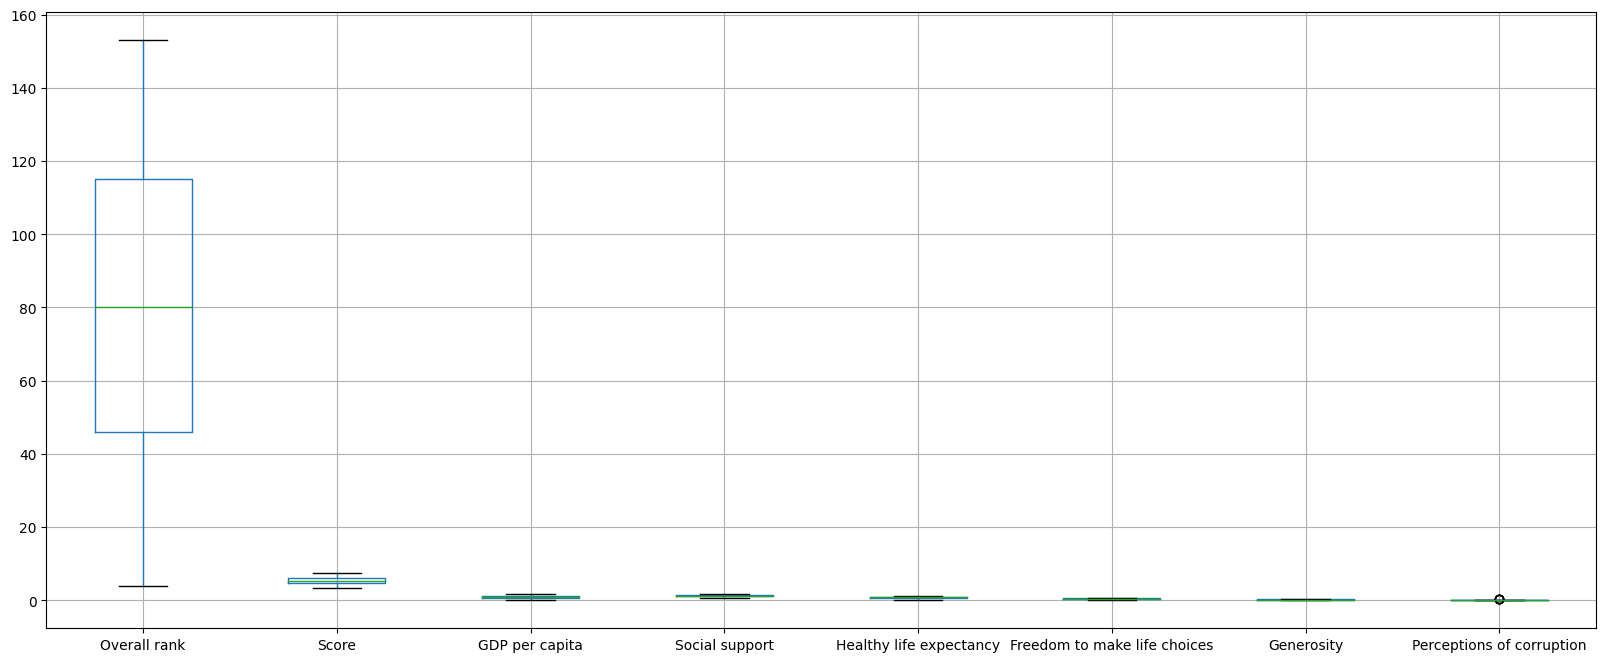

In [ ]:
def remove_outliers(df, column):
    sorted(df)
    Q1, Q3 = np.percentile(df[column],[25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df = df[(df[column] > lower_range) & (df[column] < upper_range)]
    return df

df = remove_outliers(df, 'GDP per capita')
df = remove_outliers(df, 'Social support')
df = remove_outliers(df, 'Healthy life expectancy')
df = remove_outliers(df, 'Freedom to make life choices')
df = remove_outliers(df, 'Generosity')
df = remove_outliers(df, 'Perceptions of corruption')

# Check if there is any outliers

df.boxplot(figsize=(20, 8))
plt.show()

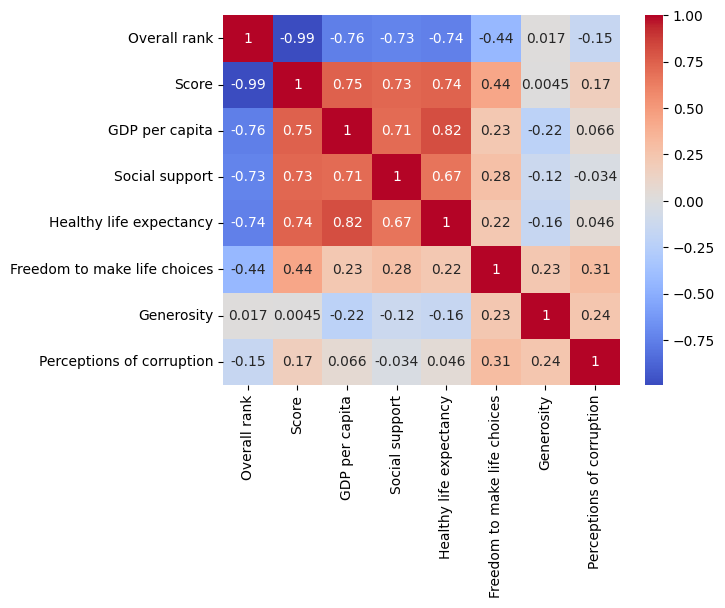

In [ ]:
# Correlation matrix

numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numeric DataFrame
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

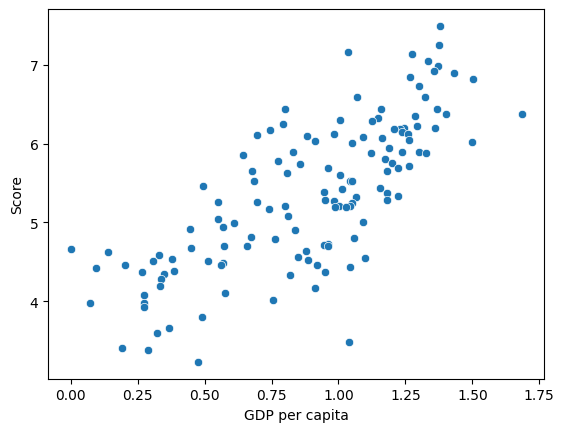

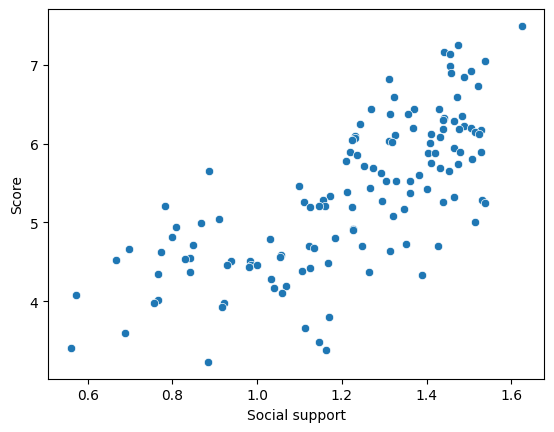

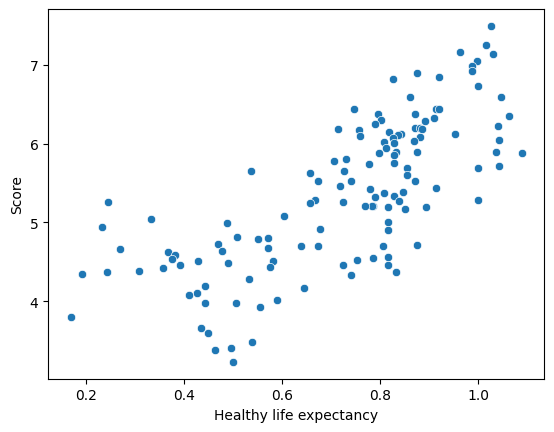

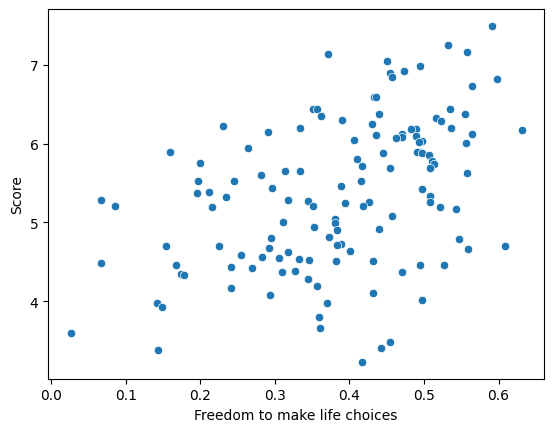

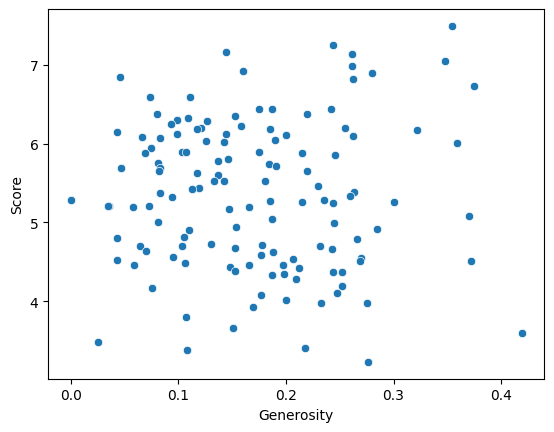

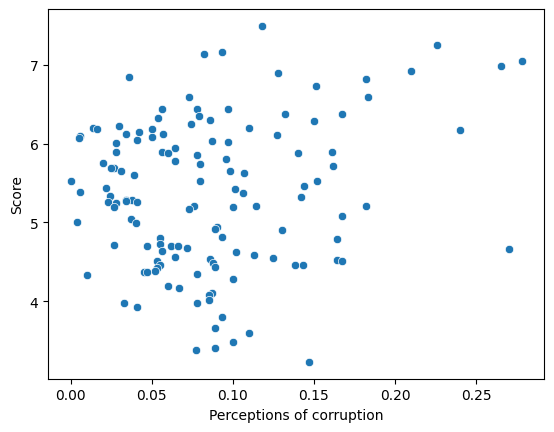

In [ ]:
# Scatter plot

sns.scatterplot(x = 'GDP per capita', y = 'Score', data = df)
plt.show()

sns.scatterplot(x = 'Social support', y = 'Score', data = df)
plt.show()

sns.scatterplot(x = 'Healthy life expectancy', y = 'Score', data = df)
plt.show()

sns.scatterplot(x = 'Freedom to make life choices', y = 'Score', data = df)
plt.show()

sns.scatterplot(x = 'Generosity', y = 'Score', data = df)
plt.show()

sns.scatterplot(x = 'Perceptions of corruption', y = 'Score', data = df)
plt.show()

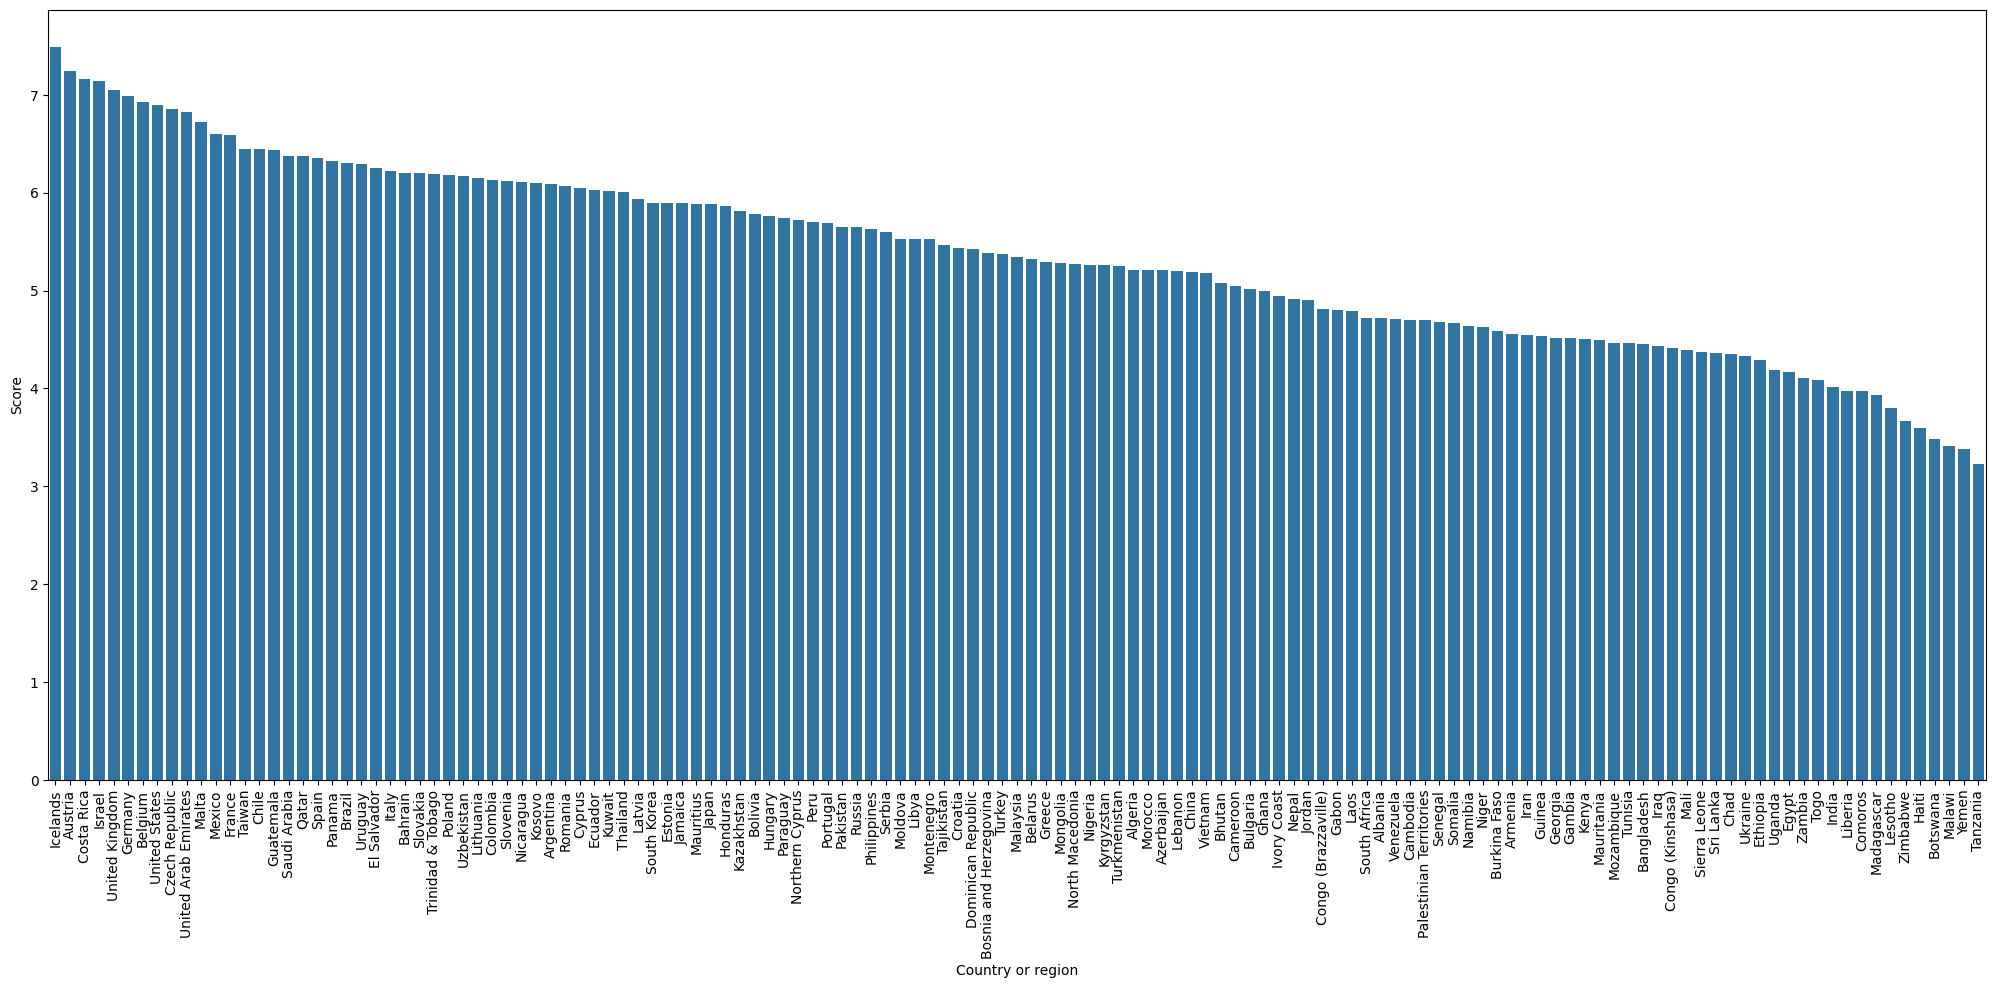

In [ ]:
plt.figure(figsize=(25, 10))
sns.barplot(x='Country or region', y='Score', data=df)
plt.xticks(rotation=90)
plt.show()

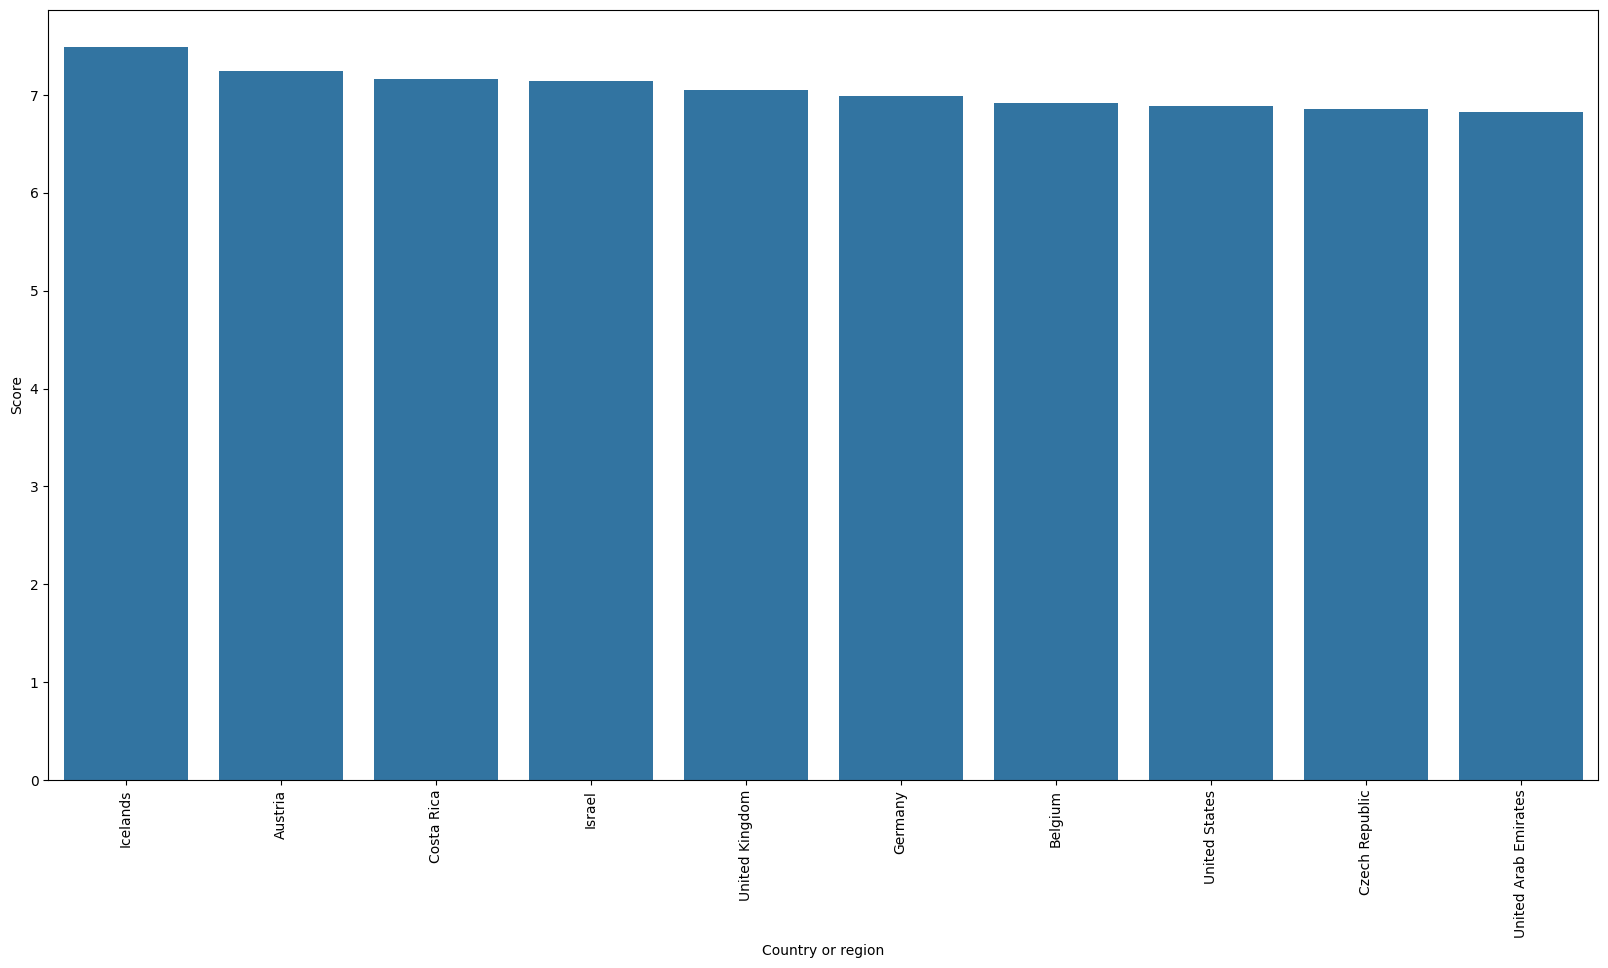

In [ ]:
# Top 10 countries with the highest happiness score

top10 = df.sort_values(by = 'Score', ascending = False).head(10)
plt.figure(figsize=(20, 10))
sns.barplot(x = 'Country or region', y = 'Score', data = top10)
plt.xticks(rotation = 90)
plt.show()

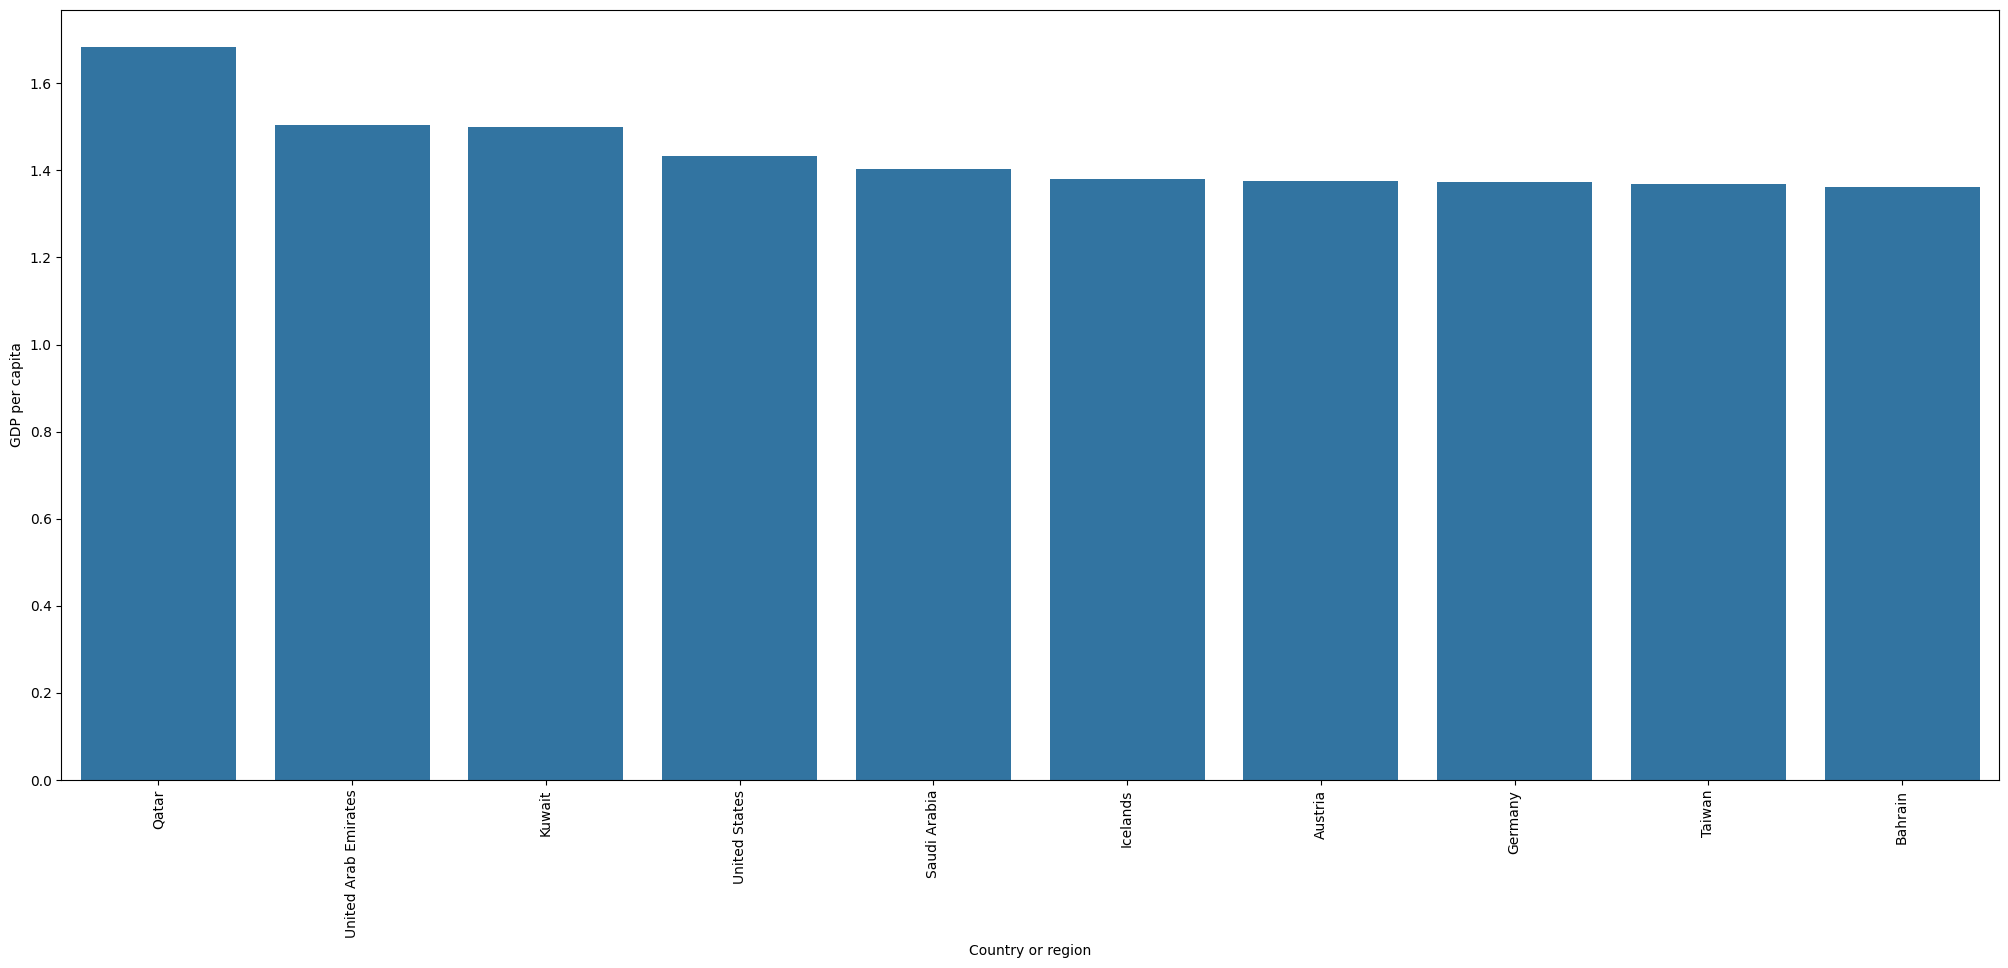

In [ ]:
# Top 10 countries with the highest GDP per capita

top10_gdp = df.sort_values(by = 'GDP per capita', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country or region', y = 'GDP per capita', data = top10_gdp)
plt.xticks(rotation = 90)
plt.show()

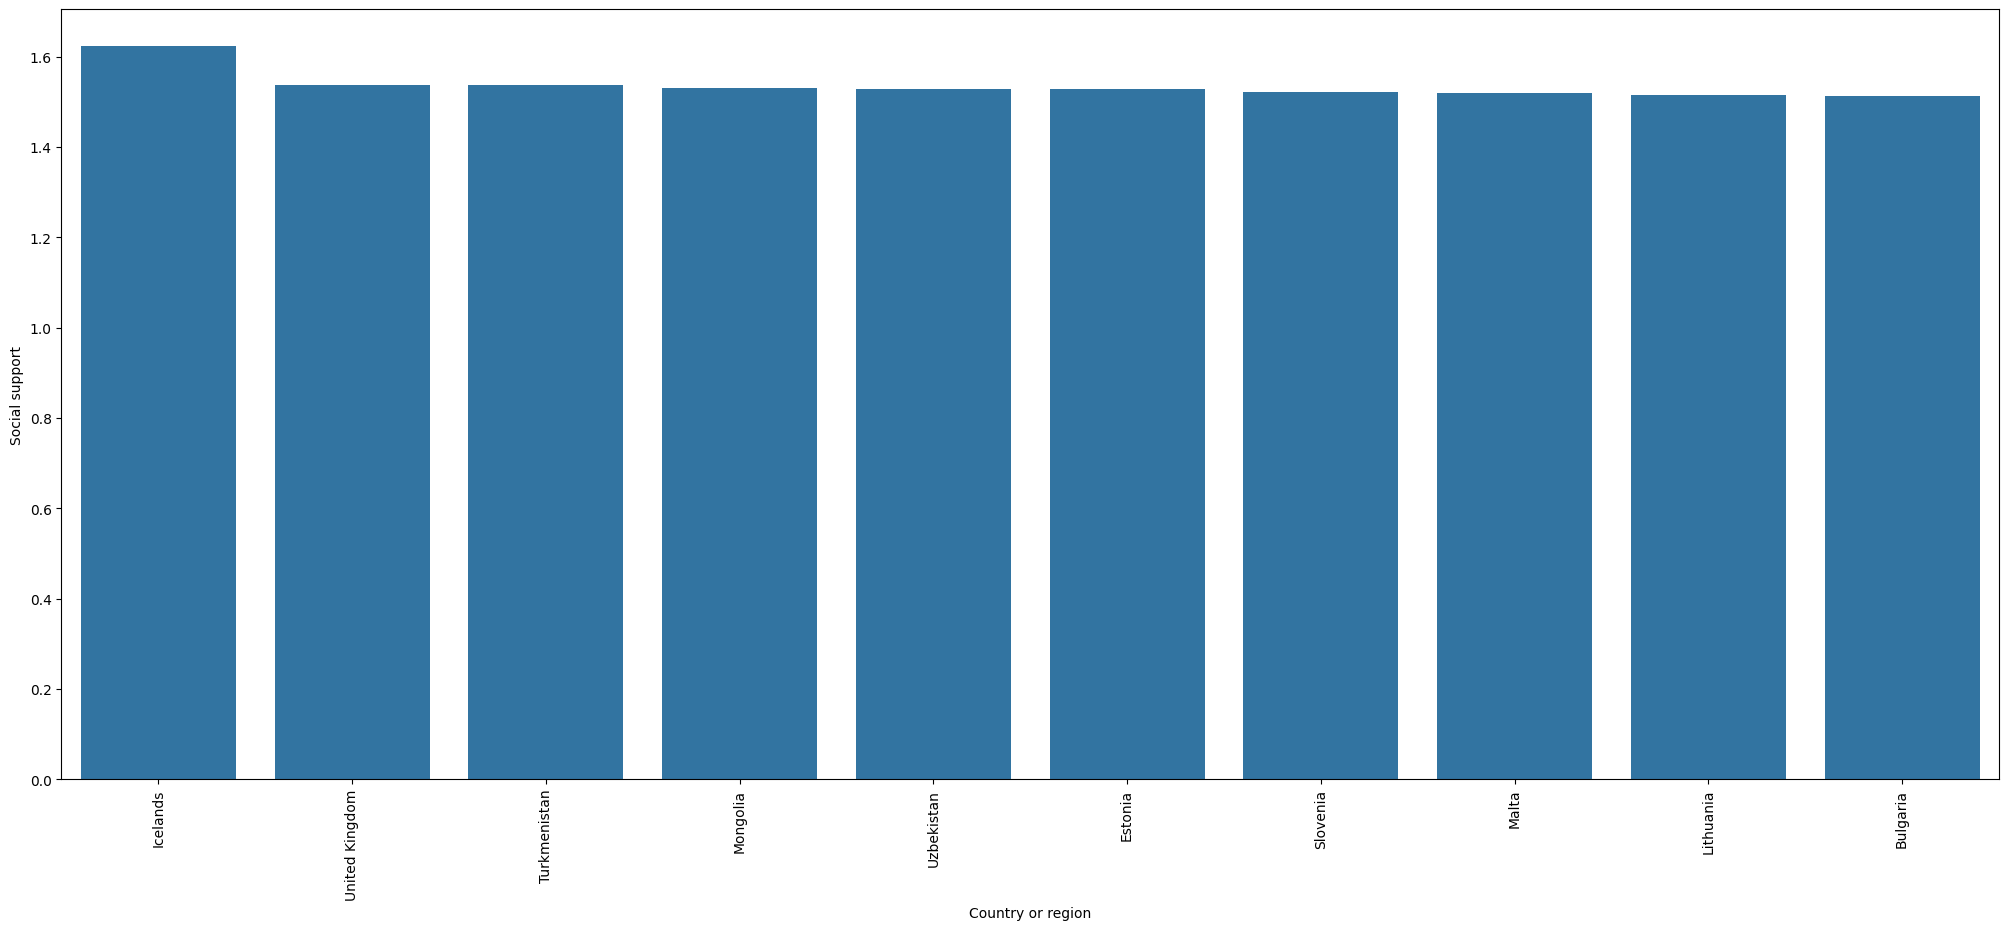

In [ ]:
# Top 10 countries with the highest social support

top10_social = df.sort_values(by = 'Social support', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country or region', y = 'Social support', data = top10_social)
plt.xticks(rotation = 90)
plt.show()

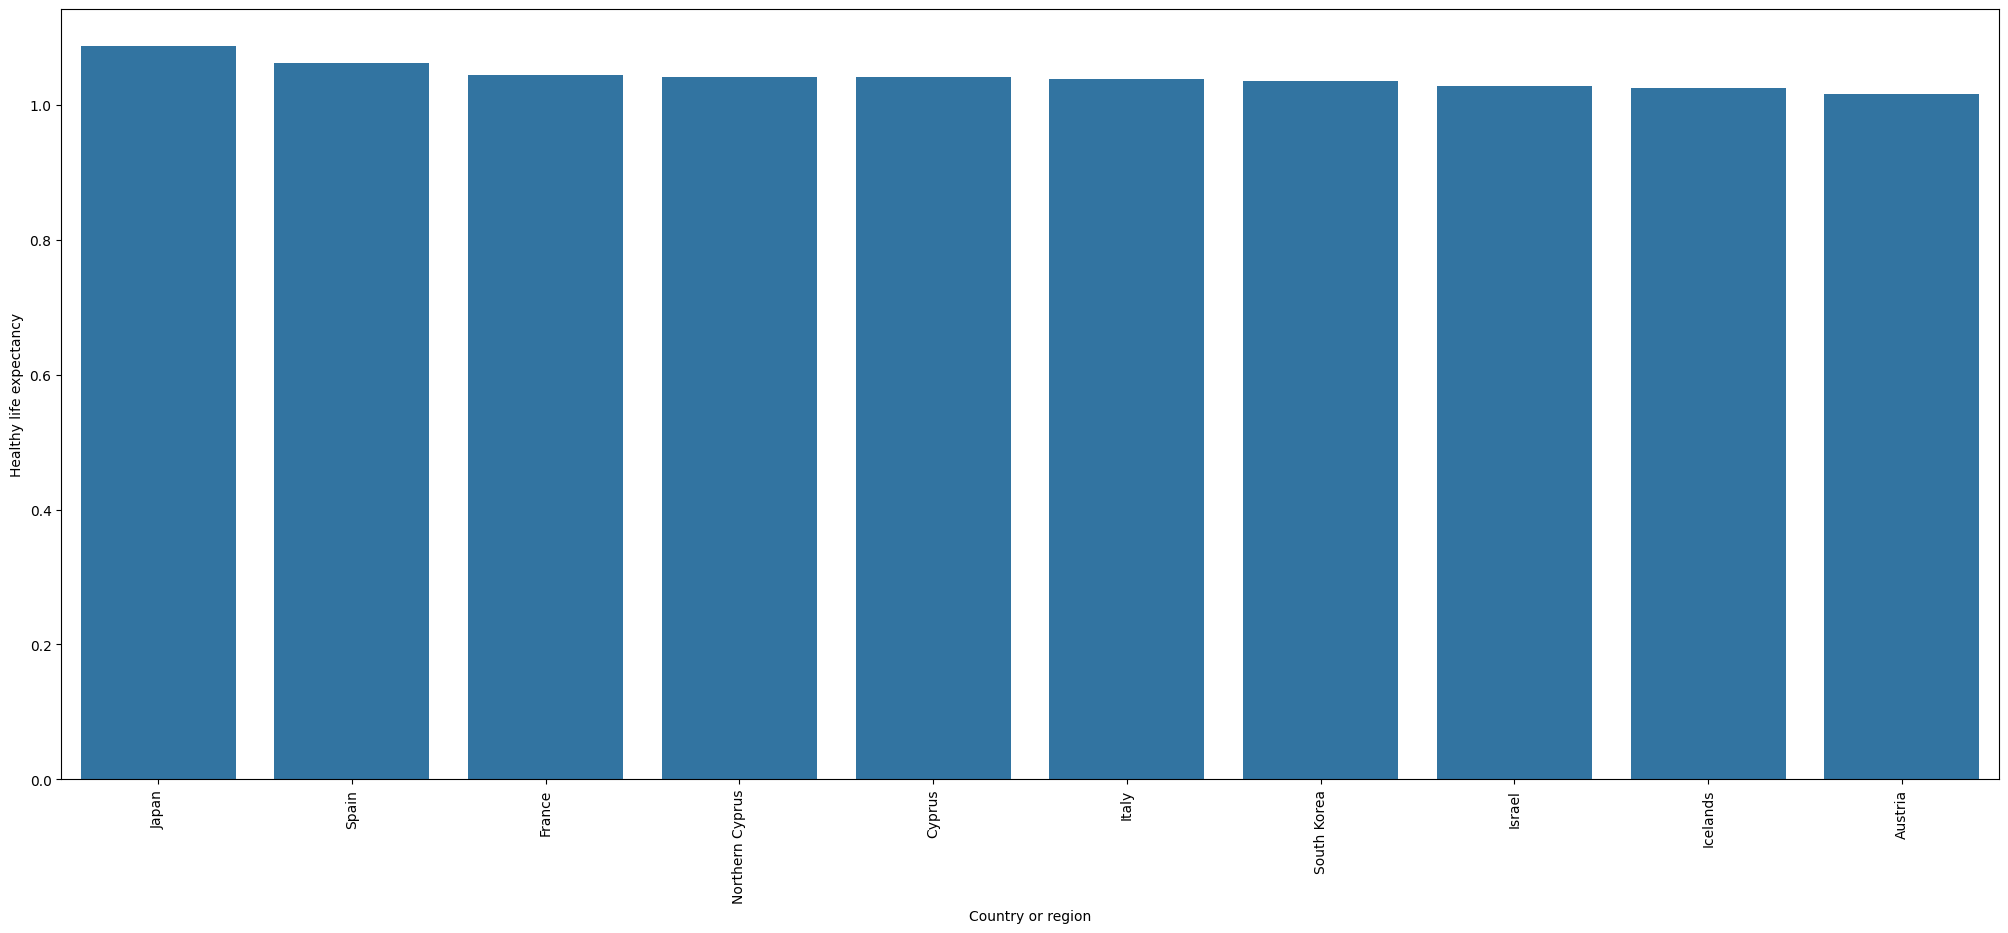

In [ ]:
# Top 10 countries with the highest healthy life expectancy

top10_health = df.sort_values(by = 'Healthy life expectancy', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country or region', y = 'Healthy life expectancy', data = top10_health)
plt.xticks(rotation = 90)
plt.show()

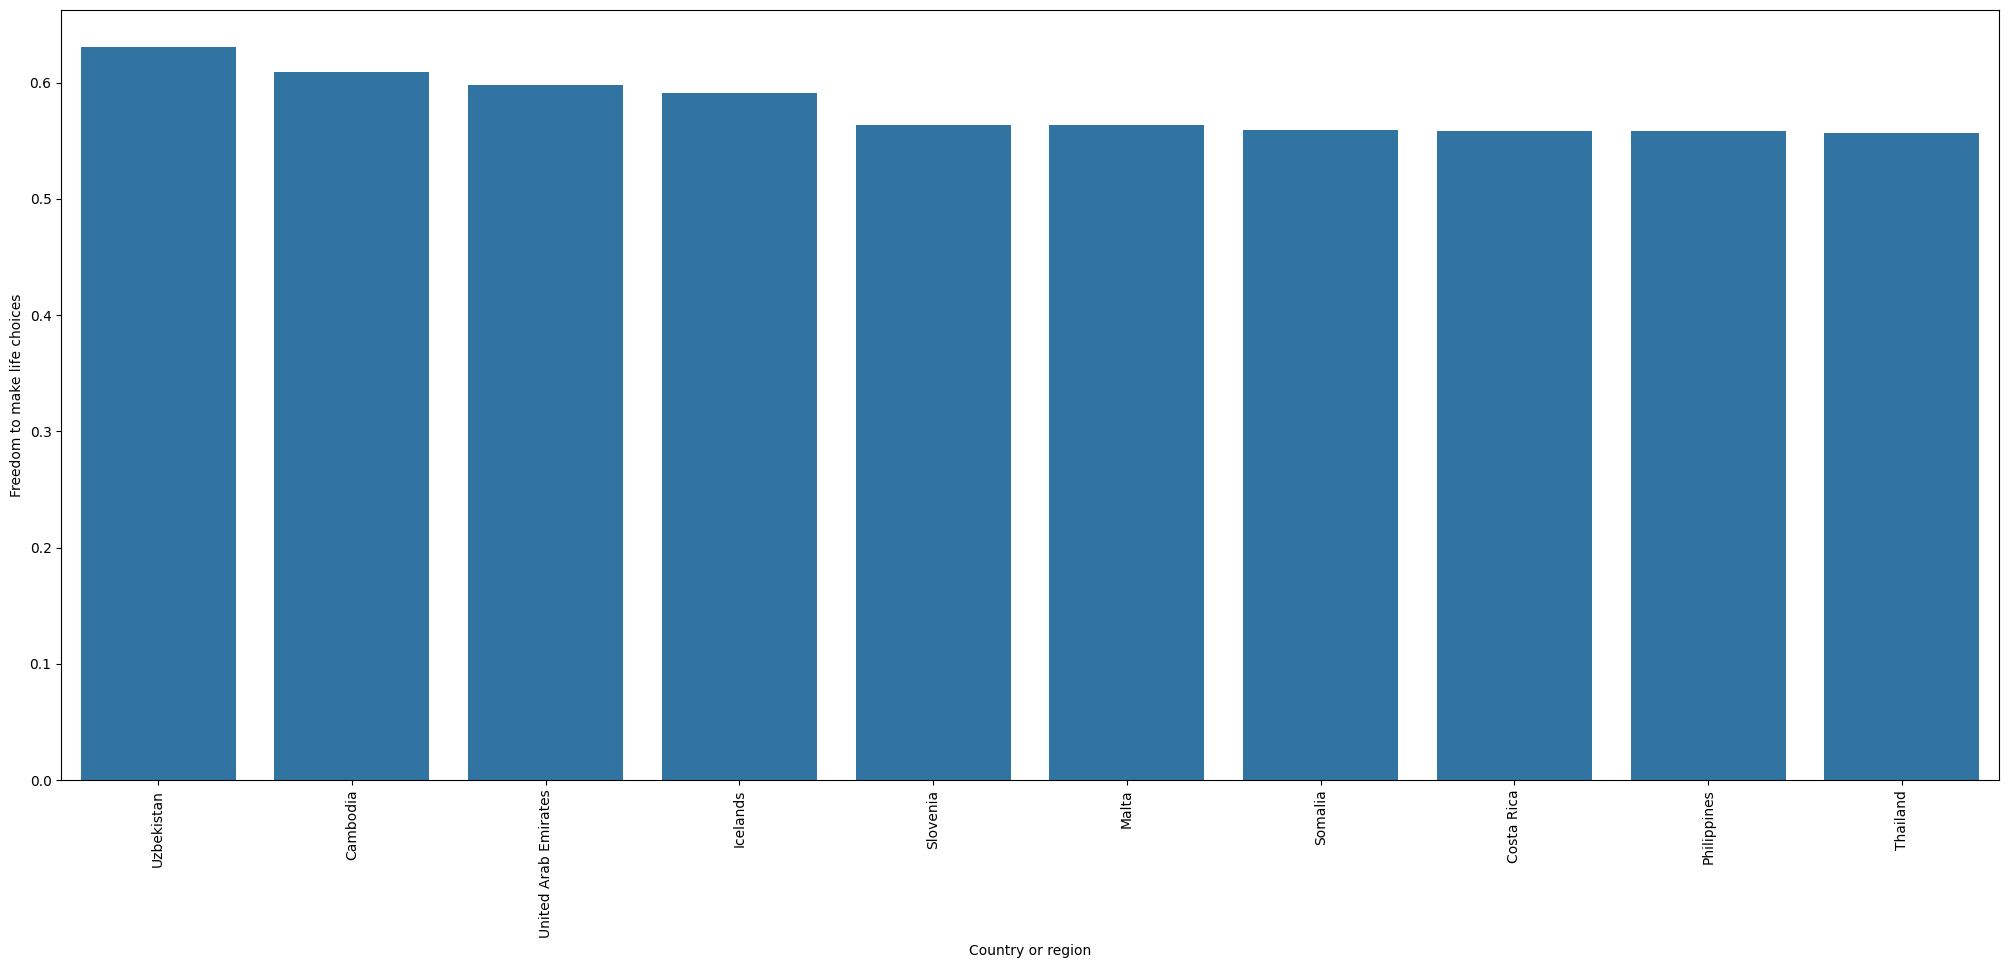

In [ ]:
# Top 10 countries with the highest Freedom to make life choices

top10_health = df.sort_values(by = 'Freedom to make life choices', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country or region', y = 'Freedom to make life choices', data = top10_health)
plt.xticks(rotation = 90)
plt.show()

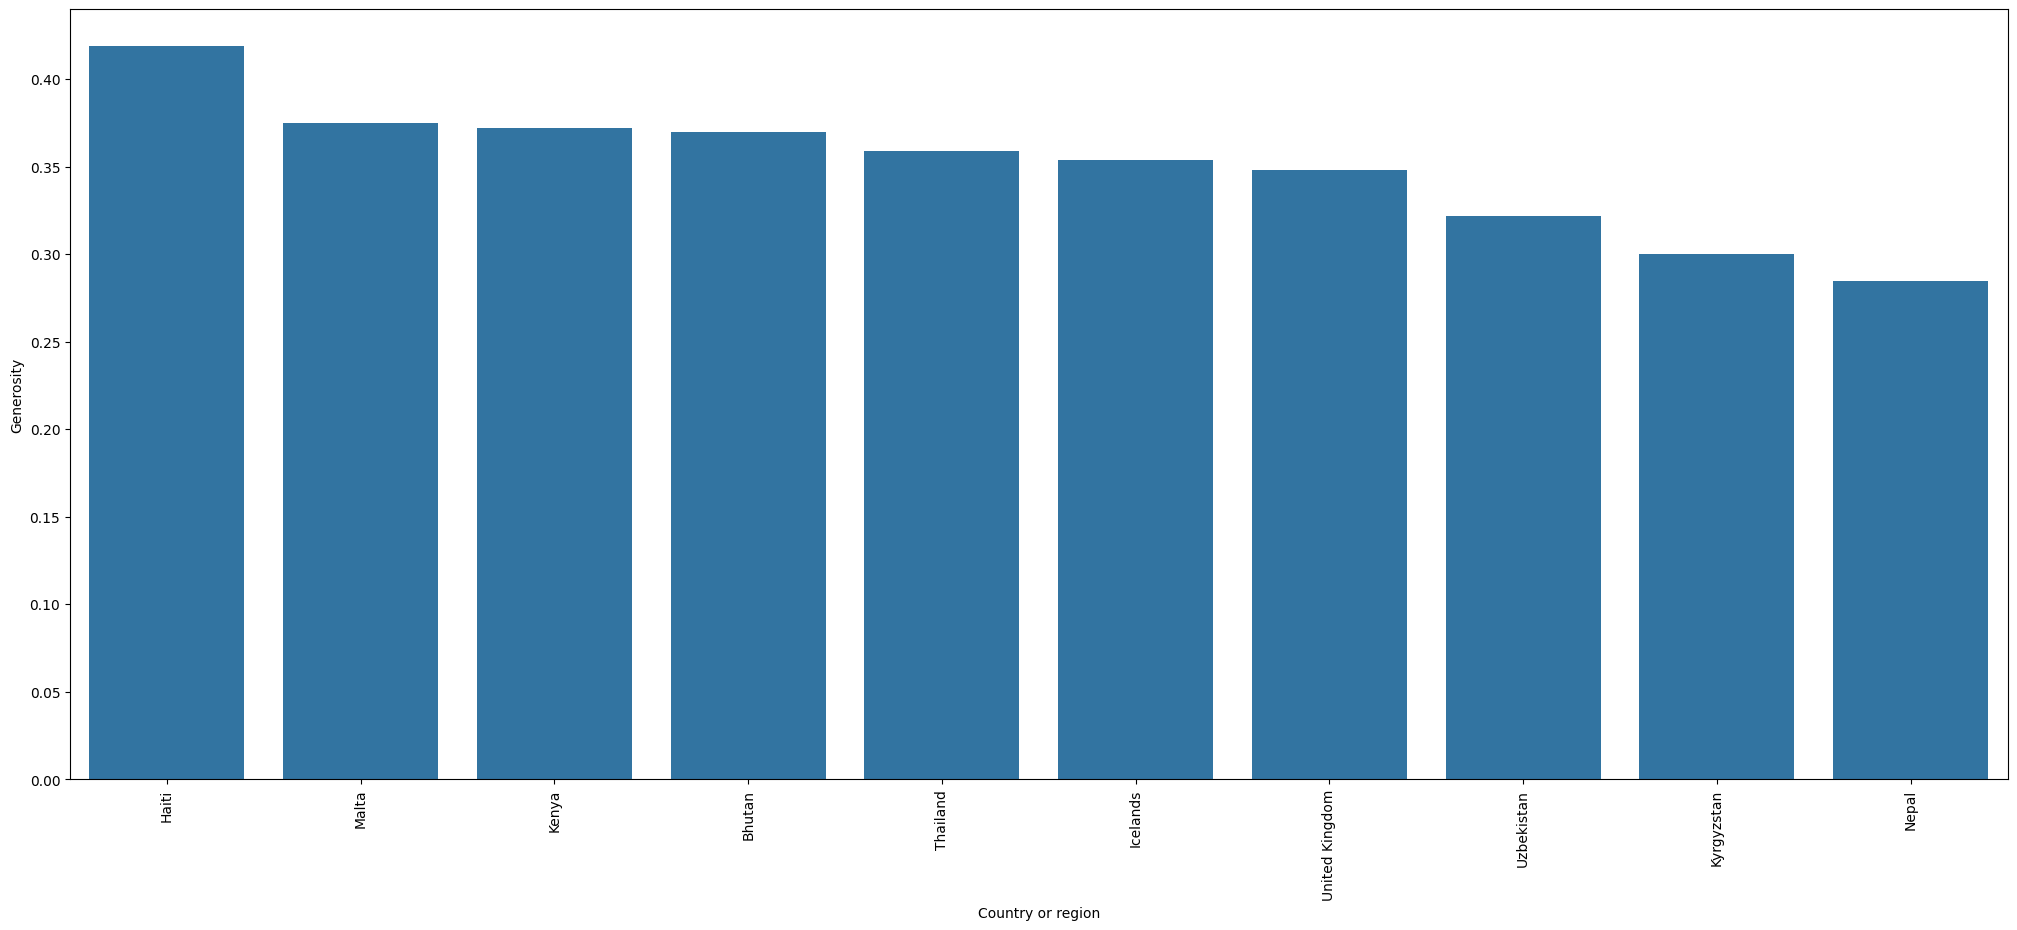

In [ ]:
# Top 10 countries with the highest Generosity

top10_health = df.sort_values(by = 'Generosity', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country or region', y = 'Generosity', data = top10_health)
plt.xticks(rotation = 90)
plt.show()

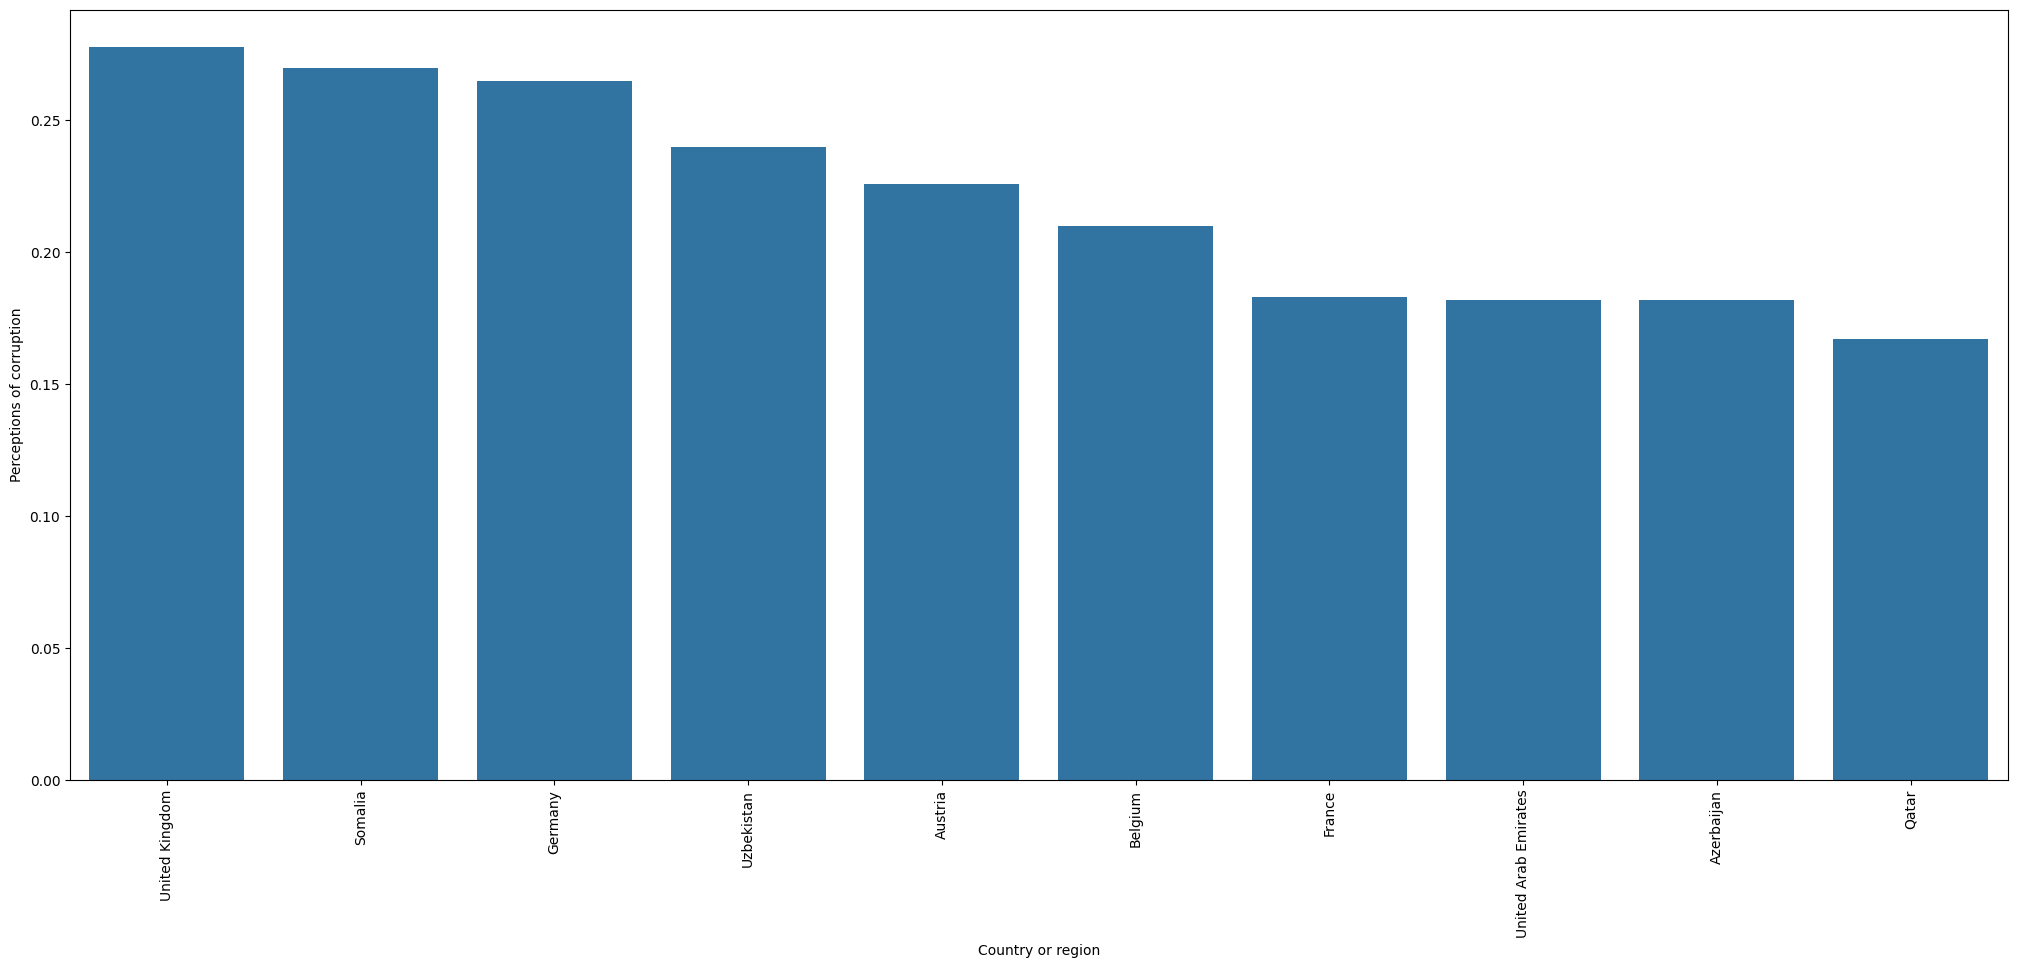

In [ ]:
# Top 10 countries with the highest Perceptions of corruption

top10_health = df.sort_values(by = 'Perceptions of corruption', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country or region', y = 'Perceptions of corruption', data = top10_health)
plt.xticks(rotation = 90)
plt.show()